## Autoencoder
 ### Flow 
#### Input Image(noisy Image) -> Encoder -> Compressed Representation-> Decoder-> Reconstruct Input Clear Image


In [85]:
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Conv2D , MaxPooling2D, UpSampling2D

from tensorflow.keras.models import Sequential
from PIL import Image
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm

import matplotlib.pyplot as plt


(512, 512)


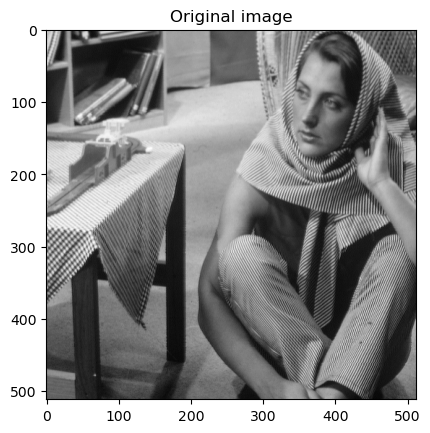

In [86]:
#load image

# Read an image
im = np.array(Image.open('barbara.png'))
#im = img_as_float(im)
# im = np.array(Image.open('misc\\brain4.jpg'))
print(im.shape)
# Show the image
plt.figure(0)
plt.imshow(im,'gray') 
plt.title('Original image')
plt.show()

(512, 512)


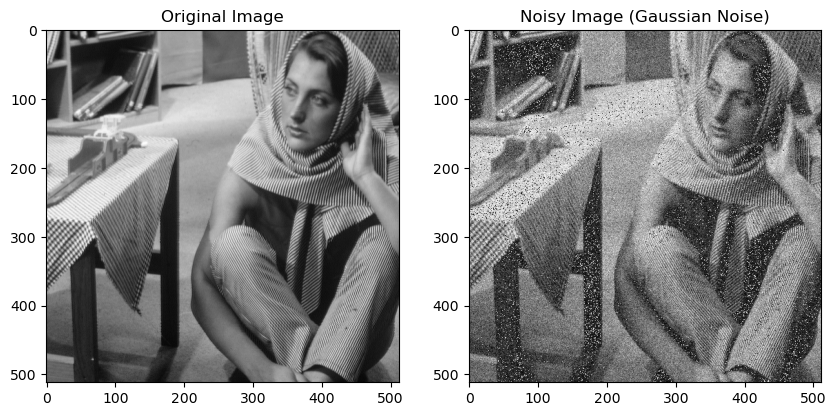

In [87]:
#Add noise

# Parameters for Gaussian noise
mean = 0
stddev = 25  # You can adjust this to control the amount of noise

# Generate Gaussian noise with the same shape as the image
noise = np.random.normal(mean, stddev, im.shape).astype(np.uint8)

# Add the noise to the image
noisy_image = np.clip(im + noise, 0, 255).astype(np.uint8)

# Show the original and noisy images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
print(noisy_image.shape)
# Noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')

plt.show()

In [96]:
np.random.seed(42)

SIZE = 512
im=cv2.resize(im,(SIZE,SIZE))
im= img_to_array(im)

img = cv2.resize(noisy_image,(SIZE,SIZE))

noisy_image= img_to_array(img)

#print(noisy_image.shape)

#print(im.shape)

#The Size is 320, 320 ,1 . The 1 stands for gray channel

#noisy_train = np.reshape(noisy_image,(len(noisy_image),SIZE,SIZE,1))
noisy_train = np.reshape(noisy_image, (SIZE, SIZE, 1))
noisy_train = noisy_train.astype('float32') / 255

clean_train = np.reshape(im, (SIZE, SIZE, 1))
clean_train = clean_train.astype('float32') / 255
#print(noisy_train)




In [95]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 512, 512, 32)      320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 256, 256, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 256, 256, 8)       2312      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 128, 128, 8)       584       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 64, 64, 8)       

In [97]:
# test and train data 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train,  test_size = 0.20, random_state = 0)


In [99]:
model.fit(x_train, y_train, epochs=5, batch_size=1, shuffle=True, verbose = 1, validation_split = 0.1)


print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))


#model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test)

expected_size = 512 * 512

# Check if the size of no_noise_img matches the expected size
if no_noise_img.size == expected_size:
    # Reshape the array
    reshaped_img = no_noise_img.reshape(320, 320)
    plt.imshow(reshaped_img, cmap="gray")
    plt.show()
else:
    print(f"The size of no_noise_img ({no_noise_img.size}) does not match the expected size ({expected_size}).")


#plt.imshow(no_noise_img.reshape(SIZE,SIZE), cmap="gray")
# #plt.imsave('sandstone/denoised_images/denoised_image.tif', no_noise_img[3].reshape(SIZE,SIZE))

# """

Epoch 1/5
368/368 [==============================] - 3s 7ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 2/5
368/368 [==============================] - 3s 7ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 3/5
368/368 [==============================] - 3s 8ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 4/5
368/368 [==============================] - 3s 8ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 0s 20ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Test_Accuracy: 0.00%
4/4 [==============================] - 0s 18ms/step
The size of no_noise_img (421888) does not match the expected size (262144).
